In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns


# Reading and re-indexing the data

In [2]:
data = pd.DataFrame(pd.read_csv('elektrik.csv'))
data = data.drop(columns = ["Tarih","Saat"])
data = data.rename(columns= {"Tuketim Miktari (MWh)" : "Consumption"})

In [3]:
# creating indexes as date
index_column = pd.date_range(start ='2016-1-1 00:00', end = '2020-5-3 23:00', freq ='H')

In [4]:
#re-index the data according to dates.
data.index = index_column
data.index.names = ['Date']
data.head()

,Consumption
Date,
2016-01-01 00:00:00,"26.277,24"
2016-01-01 01:00:00,"24.991,82"
2016-01-01 02:00:00,"23.532,61"
2016-01-01 03:00:00,"22.464,78"
2016-01-01 04:00:00,"22.002,91"


In [5]:
# For calculations, type of the consumption must be float.
data['Consumption'] = [float(str(val).replace('.','').replace(',','.')) for val in data['Consumption'].values]

In [6]:
data.head()


,Consumption
Date,
2016-01-01 00:00:00,26277.24
2016-01-01 01:00:00,24991.82
2016-01-01 02:00:00,23532.61
2016-01-01 03:00:00,22464.78
2016-01-01 04:00:00,22002.91


In [7]:
# Data can be reached by typing the date. 
print(data.loc['2017-08-10 00'])

Consumption    37741.73
Name: 2017-08-10 00:00:00, dtype: float64


# Data Visualization

## Hourly

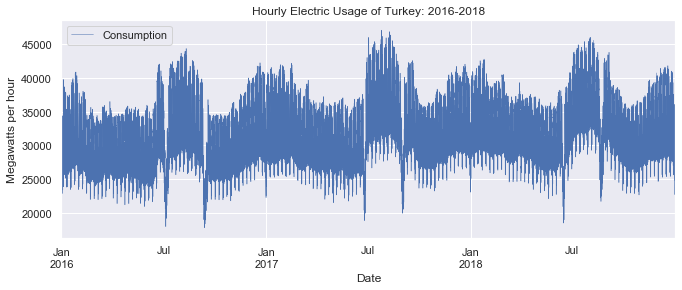

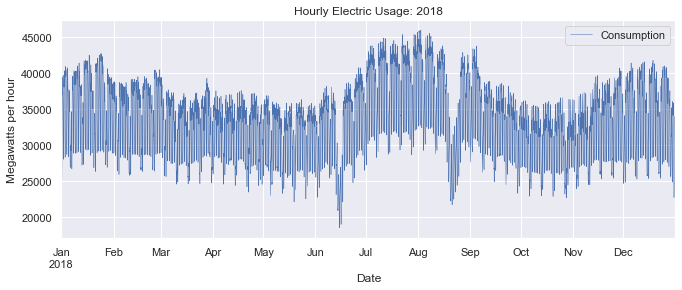

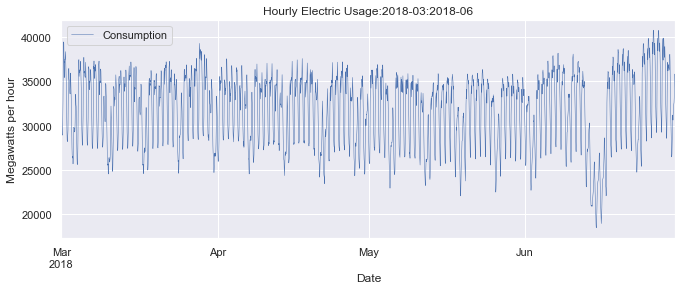

In [8]:

data = data[:"2019"]
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
data[:"2018"].plot(linewidth=0.5);
plt.title("Hourly Electric Usage of Turkey: 2016-2018")
plt.ylabel("Megawatts per hour")
plt.show()
data["2018"].plot(linewidth=0.5)
plt.title("Hourly Electric Usage: 2018")
plt.ylabel("Megawatts per hour")
plt.show()

data["2018-03":"2018-06"].plot(linewidth=0.5)
plt.title("Hourly Electric Usage:2018-03:2018-06")
plt.ylabel("Megawatts per hour")
plt.show()


## Daily

In [9]:
# Resampling for visualize daily data.
daily_groups = data.resample('D')
daily_data = daily_groups.sum()

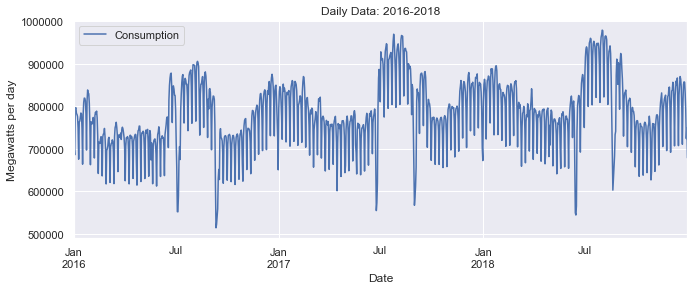

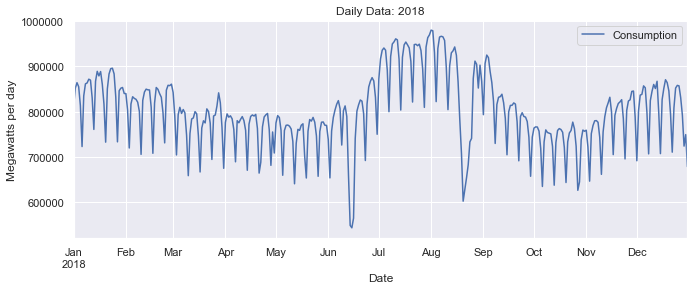

In [10]:
daily_data[:"2018"].plot()
plt.title("Daily Data: 2016-2018")
plt.ylabel("Megawatts per day")
plt.show()
daily_data["2018"].plot()
plt.title("Daily Data: 2018")
plt.ylabel("Megawatts per day")
plt.show()

In [11]:
daily_data.to_csv('consumption_daily.csv')